In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import tqdm
from sklearn.preprocessing import StandardScaler

In [62]:
raw_data = pd.read_csv('additionalData.csv',sep=';')
raw_data.shape

(1000, 37)

In [63]:
raw_data.columns

Index(['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12',
       'QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
       'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
       'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7', 'Q_8'],
      dtype='object')

In [64]:
target_cols = raw_data.columns[0:12]
target_cols

Index(['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12'],
      dtype='object')

In [65]:
target = raw_data.loc[:,target_cols]
target

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
0,"0,659031164931906","0,927404165099764","0,969497343162401","0,629649173936827","0,667652124875607","0,842466362269501","0,584463362676434","0,432479332004544","0,667729743869774","0,316184198508648","0,547316468994810","0,546793644001026"
1,"0,276092331328292","0,334797496982722",1,1,"0,865308042010795","0,554899271801589","0,586538062479209","0,461713937558117","0,778915007278636","0,213431169017956","0,694400144784324",1
2,"0,382780118191836","0,454029654267627","0,380131933202104","0,928785321275196","0,242437689143522","0,393960485087603","0,763013901722922","0,227944783258518","0,798731078150303","0,605129720471117","0,231669311784369","0,550089643594031"
3,"0,909359736008746",1,"0,986955257173702","0,478319873692460",1,"0,551382545993771","0,510171043937476","0,655539351996179","0,949369775607145","0,696795650257409",1,"0,529789263098497"
4,"0,212250320484188","0,430666804409951","0,788894472120501","0,248273639056793","0,413688824211363","0,921254373955806","0,631728824230411","0,877051495580205","0,399887045937857","0,586105070305096","0,726442327770886","0,236711132732742"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,"0,562366083625215","0,305469529842992","0,952086129115506","0,804423190189066","0,496049729475212","0,930261120436179","0,659485370584089","0,448331651418788","0,890906569948397",1,"0,235464129464636"
996,"0,494055391358609","0,725625779454248","0,377654244713832",1,"0,643087776145883","0,236251329320613","0,386082761115744","0,318083633799139","0,638542016094072","0,266911720385667","0,334567240200735","0,409348478500360"
997,1,"0,484531414769859","0,888750714324157","0,525975499892721","0,896969252230274","0,953683500648083",1,"0,992788037574663","0,480868307609628","0,789479005770988","0,506966685221777","0,782051025807199"
998,"0,679916649709549",1,1,"0,502042298083429","0,977697269354077","0,768935619775316","0,615719998284829","0,480745851005877","0,201559802531509","0,892136588279262","0,848692836991055",1


In [66]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   valve_1   1000 non-null   object
 1   valve_2   1000 non-null   object
 2   valve_3   1000 non-null   object
 3   valve_4   1000 non-null   object
 4   valve_5   1000 non-null   object
 5   valve_6   1000 non-null   object
 6   valve_7   1000 non-null   object
 7   valve_8   1000 non-null   object
 8   valve_9   1000 non-null   object
 9   valve_10  1000 non-null   object
 10  valve_11  1000 non-null   object
 11  valve_12  1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [67]:
for c in target_cols:
    target[c]=target[c].apply(lambda x: x.replace(',','.'))
    target[c] = pd.to_numeric(target[c])
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   valve_1   1000 non-null   float64
 1   valve_2   1000 non-null   float64
 2   valve_3   1000 non-null   float64
 3   valve_4   1000 non-null   float64
 4   valve_5   1000 non-null   float64
 5   valve_6   1000 non-null   float64
 6   valve_7   1000 non-null   float64
 7   valve_8   1000 non-null   float64
 8   valve_9   1000 non-null   float64
 9   valve_10  1000 non-null   float64
 10  valve_11  1000 non-null   float64
 11  valve_12  1000 non-null   float64
dtypes: float64(12)
memory usage: 93.9 KB


In [68]:
data = raw_data.drop(target_cols, axis=1)
data

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
0,"13,4504967185836","16,9508524717381","4,69540826069228","2,62303441541471","4,99945955368475","5,99771468239922","313175,070627389","332793,206166958","243991,971462508","226548,727880258",...,"256883,260707205","293947,646443106","1,37546679121967","0,708006379630272","0,731159210324120","0,775955255163789","0,761054172617928","3,00259340945558","1,43333673968857","2,67206223061534"
1,"6,56584803631199","7,42088464783224",0,"0,916420643437863","3,60923877279568","1,62642862918262","209127,367597578","212643,841421737","180040,598530916","170070,766019917",...,"180412,015605714","202534,597170737","0,928677899447534","0,507495282885295","0,477630482544313","0,536716325789743","0,548789227060956","2,13144319245651","0,945963548999714","1,77889664777284"
2,"8,77475195492149","9,68143355819717","2,39382492801491","3,19168763695660","1,47349446404622","3,19651081946415","241542,585367474","245925,098008119","160657,565592451","170571,310874451",...,"182926,438974206","230268,313604848","0,739386147587801","0,425450187048479","0,519500188371304","0,572230481488787","0,593294911147412","2,68961099610503","0,961235738235498","2,69391736755963"
3,"17,3796751913784","17,9035965394580","4,41984068050385","4,43594747880344","7,46741372202466","6,47151275791663","341732,422615623","341165,329996091","274020,784218026","228157,121955247",...,"272828,293988764","312330,390188154","1,55650876792114","0,729495811394745","0,698693708946671","0,767520937865858","0,765646558367805","2,96929630214343","1,56015201243005","2,31221218399738"
4,"5,02731067823886","9,37003567771763",0,"2,38267198380377","3,67012534290253","0,889596784117066","213047,047216069","229546,303269837","163188,054366026","165403,964282872",...,"179273,287902127","213184,011651925","0,827460497215750","0,478936766618693","0,500230303578584","0,540164814295820","0,514422550423182","2,13933890284537","0,963795039042931","1,15779974639584"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"18,6559659652316","10,8346165571251","2,02758453526490","5,57164559993822","7,25359061697890","2,89227792803886","350802,787954225","308681,240429834","250573,598188403","222271,888166574",...,"236126,293196371","313358,038249220","1,42895188698565","0,723660083492650","0,658818166025372","0,757942695425844","0,778436528552464","3,08200752763923","1,32089558731562","2,45867515828753"
996,"10,5455582866143","14,0861578131964","4,53432668172110","2,22938479807100","3,05591717563316","3,98612019772374","289541,114712506","304836,789604810","225399,538597980","211691,083151237",...,"214868,861988462","276717,652409315","1,25672784532921","0,634782681841622","0,680867101438506","0,740239312124468","0,694851915664174","3,03701107809428","1,18081105098184","3,28632902196508"
997,"19,8717254334770","9,87411705002300","2,25711430623697","5,03920981774740","3,77516996530765","7,42148031899358","325544,429708710","277307,286236760","233898,188793597","212389,795113660",...,"245562,222289667","273374,945187073","1,31517711703488","0,652292463849253","0,653223743768842","0,698878371412855","0,701686759875525","2,81551024211465","1,38083394907416","-0,321577541987281"
998,"14,4149736586846","18,6457908716280","0,989224798328525","5,82860474661646","6,32293472597515","8,72047584329295","293369,134289854","324171,066057000","250430,261519159","215056,097798218",...,"235860,853819611","263307,244650371","1,39162542884332","0,673328243609284","0,658010957016999","0,682872680786782","0,721181061844530","2,64804038912002","1,32467910884670","1,84627599216960"


In [69]:
Q_cols = []
P_cols = []
Q_plants = ['QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4']
for c in data.columns:
    if 'Q_' in c:
        Q_cols.append(c)
    elif 'P_' in c:
        P_cols.append(c)
        

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   QGRS_1    1000 non-null   object
 1   QGRS_2    1000 non-null   object
 2   QPlant_1  1000 non-null   object
 3   QPlant_2  1000 non-null   object
 4   QPlant_3  1000 non-null   object
 5   QPlant_4  1000 non-null   object
 6   PGRS_1    1000 non-null   object
 7   PGRS_2    1000 non-null   object
 8   P_1       1000 non-null   object
 9   P_2       1000 non-null   object
 10  P_3       1000 non-null   object
 11  P_4       1000 non-null   object
 12  P_5       1000 non-null   object
 13  P_6       1000 non-null   object
 14  P_7       1000 non-null   object
 15  P_8       1000 non-null   object
 16  P_9       1000 non-null   object
 17  Q_1       1000 non-null   object
 18  Q_2       1000 non-null   object
 19  Q_3       1000 non-null   object
 20  Q_4       1000 non-null   object
 21  Q_5       1000 

In [71]:
for c in data.columns:
    data[c]=data[c].apply(lambda x: x.replace(',','.'))
    data[c] = pd.to_numeric(data[c])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   QGRS_1    1000 non-null   float64
 1   QGRS_2    1000 non-null   float64
 2   QPlant_1  1000 non-null   float64
 3   QPlant_2  1000 non-null   float64
 4   QPlant_3  1000 non-null   float64
 5   QPlant_4  1000 non-null   float64
 6   PGRS_1    1000 non-null   float64
 7   PGRS_2    1000 non-null   float64
 8   P_1       1000 non-null   float64
 9   P_2       1000 non-null   float64
 10  P_3       1000 non-null   float64
 11  P_4       1000 non-null   float64
 12  P_5       1000 non-null   float64
 13  P_6       1000 non-null   float64
 14  P_7       1000 non-null   float64
 15  P_8       1000 non-null   float64
 16  P_9       1000 non-null   float64
 17  Q_1       1000 non-null   float64
 18  Q_2       1000 non-null   float64
 19  Q_3       1000 non-null   float64
 20  Q_4       1000 non-null   float

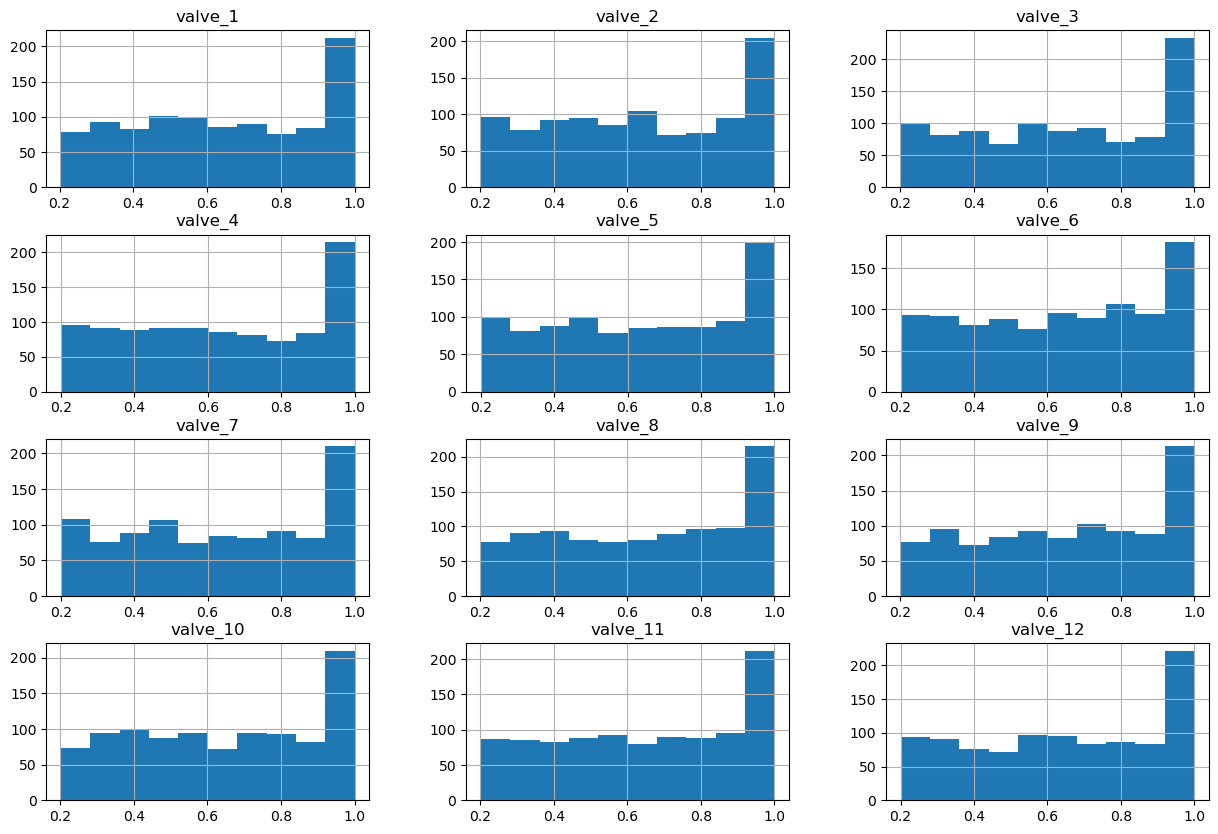

In [72]:
target.hist(figsize=(15,10))
plt.show()

In [73]:
target.describe()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.649251,0.642499,0.651189,0.640645,0.643187,0.642073,0.641430,0.658988,0.658122,0.649986,0.652922,0.653011
std,0.249609,0.254096,0.257775,0.257169,0.255098,0.250463,0.256421,0.252369,0.249204,0.250105,0.252565,0.256119
min,0.203683,0.200921,0.200579,0.200135,0.200065,0.200226,0.200736,0.201612,0.200846,0.202319,0.201193,0.200168
25%,0.439627,0.419767,0.410705,0.409164,0.428696,0.425937,0.425669,0.432132,0.449165,0.427443,0.438742,0.427594
50%,0.643053,0.638009,0.650181,0.629814,0.655682,0.666050,0.641136,0.678504,0.673967,0.659210,0.663468,0.660440
75%,0.880952,0.882987,0.906036,0.887540,0.879084,0.863612,0.884310,0.891122,0.882698,0.888430,0.890215,0.892337
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


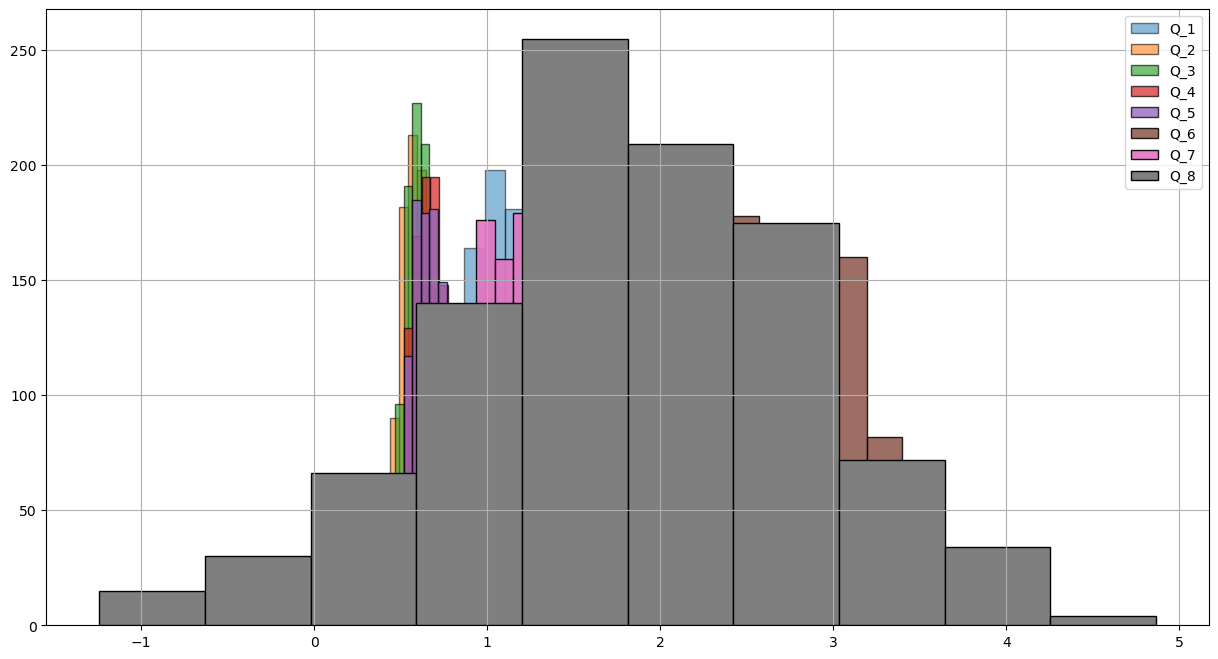

In [74]:
i=0;
for c in data.columns:
    if 'Q_' in c:
        data[c].hist(label=c, figsize=(15,8),edgecolor='k', alpha=(0.5+i/14))
        i+=1
plt.legend()
plt.show()

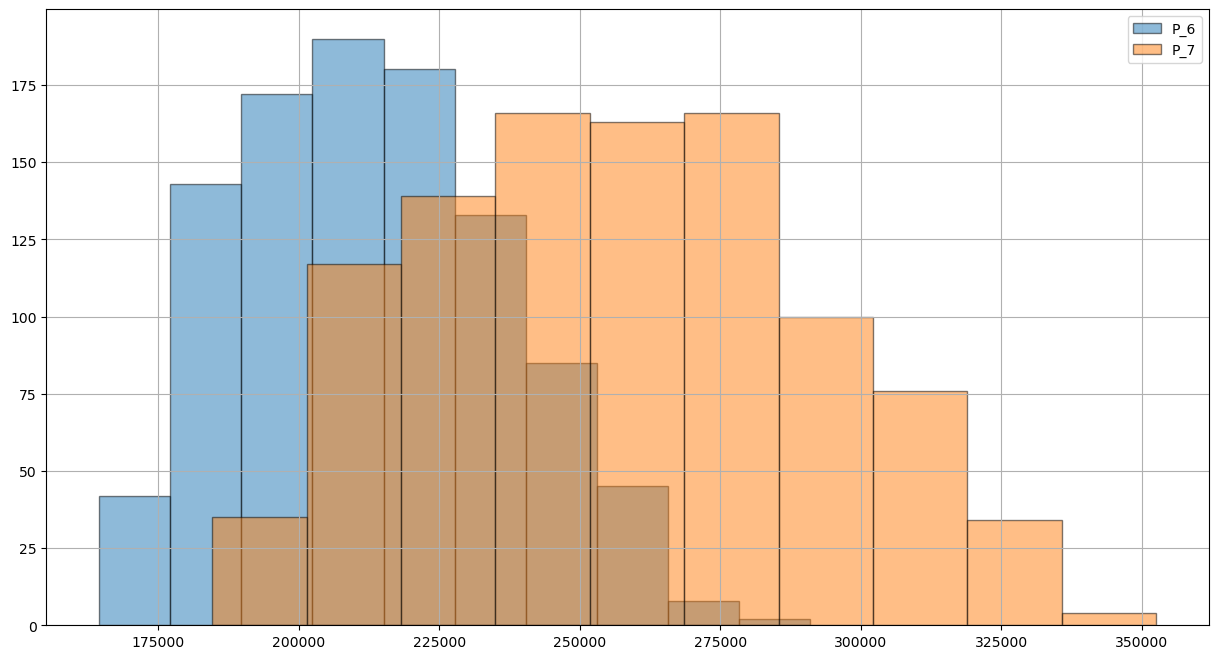

In [75]:
i=0;
data['P_6'].hist(label='P_6', figsize=(15,8),edgecolor='k', alpha=(0.5))
data['P_7'].hist(label='P_7', figsize=(15,8),edgecolor='k', alpha=(0.5))

plt.legend()
plt.show()

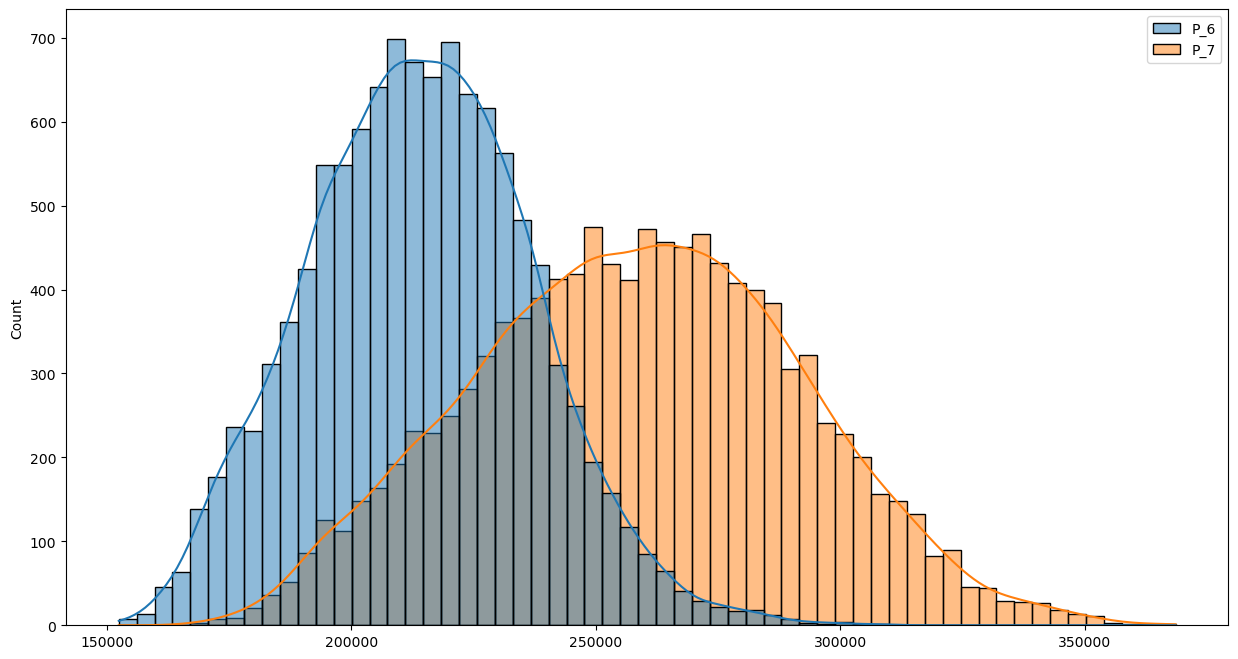

In [17]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data=data[['P_6','P_7']], kde=True, ax=axes)
plt.show()

In [76]:
data['P_2']-data['P_1']
data['Q_2']+data['Q_1']

0      2.083473
1      1.436173
2      1.164836
3      2.286005
4      1.306397
         ...   
995    2.152612
996    1.891511
997    1.967470
998    2.064954
999    2.269202
Length: 1000, dtype: float64

In [77]:
def corr_plot(X,Y):
    fig, axes = plt.subplots(figsize=(15,8))
    
    axes.plot(X,Y,'.', alpha=0.5)


    axes.vlines(X.mean(),Y.min(),Y.max(), colors='r',linewidth=2.75)
    axes.hlines(Y.mean(),X.min(), X.max(), colors='g', linewidth=2.75)

    plt.show()

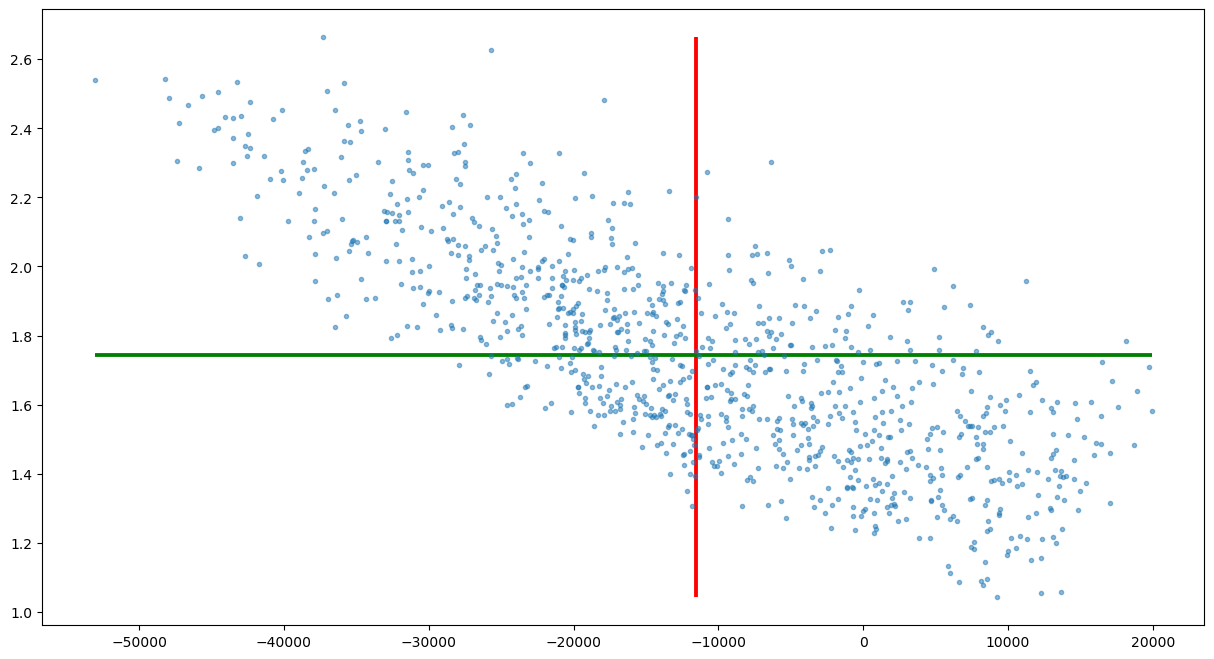

In [78]:
corr_plot(data['P_2']-data['P_1'],data['Q_2']+data['Q_1'])

In [79]:
(data['P_2']-data['P_1']).corr(data['Q_2']+data['Q_1'])

-0.777384075045264

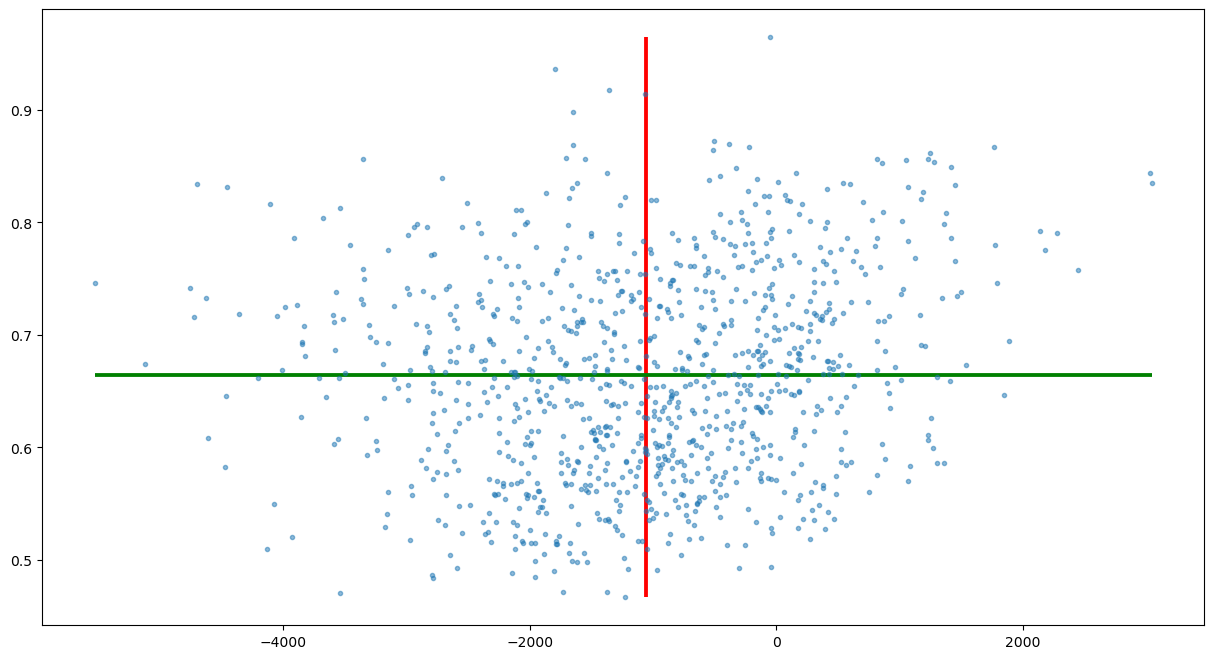

In [80]:
corr_plot(data['P_6']-data['P_5'],data['Q_5'])

In [81]:
(target['valve_6']).corr(data['Q_7'])

0.021197553534389235

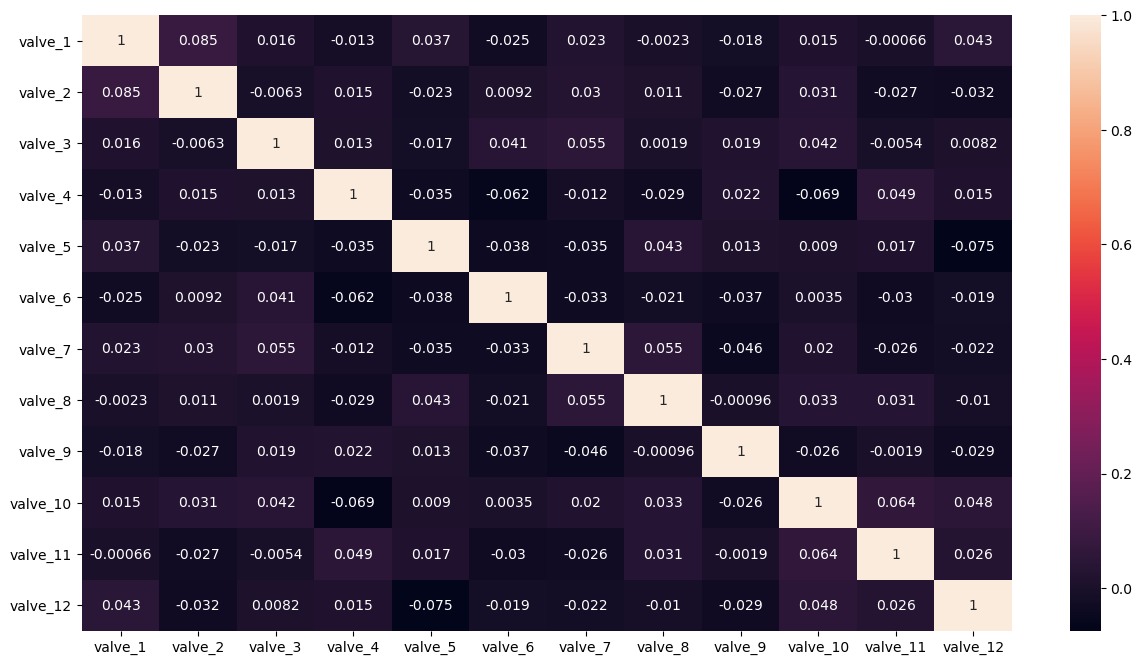

In [82]:
fig ,ax = plt.subplots(figsize=(15,8))
sns.heatmap(target.corr(), annot=True, ax=ax)
plt.show()

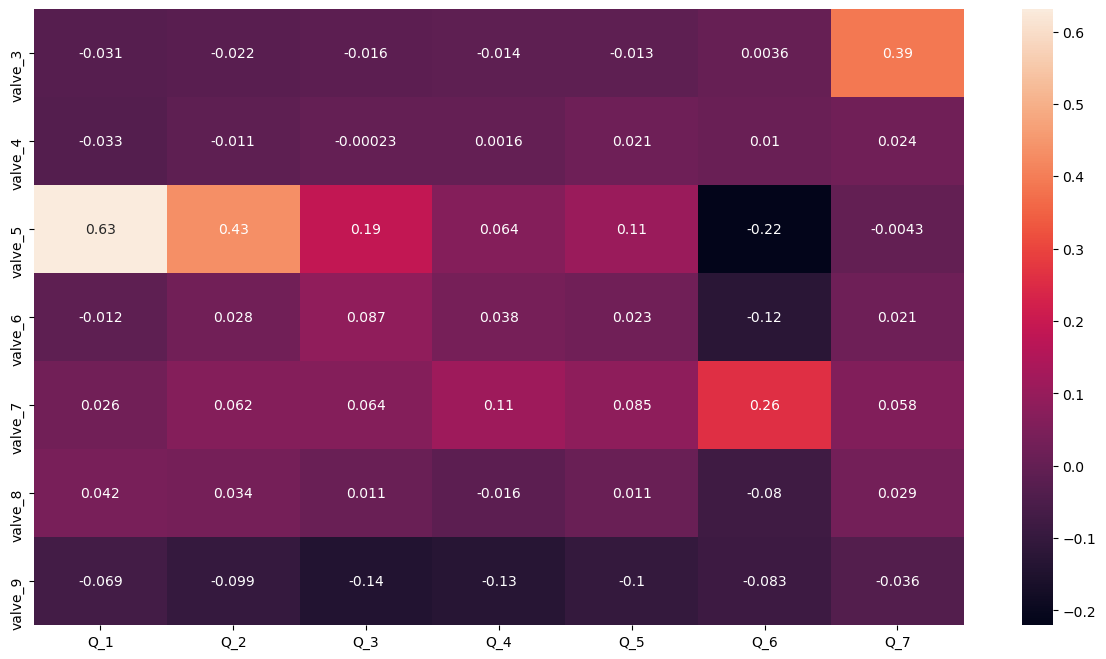

In [83]:
fig ,ax = plt.subplots(figsize=(15,8))
sns.heatmap((data[Q_cols].join(target)).corr().loc['valve_3':'valve_9','Q_1':'Q_7'], annot=True, ax=ax)
plt.show()

In [84]:
target.describe()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.649251,0.642499,0.651189,0.640645,0.643187,0.642073,0.641430,0.658988,0.658122,0.649986,0.652922,0.653011
std,0.249609,0.254096,0.257775,0.257169,0.255098,0.250463,0.256421,0.252369,0.249204,0.250105,0.252565,0.256119
min,0.203683,0.200921,0.200579,0.200135,0.200065,0.200226,0.200736,0.201612,0.200846,0.202319,0.201193,0.200168
25%,0.439627,0.419767,0.410705,0.409164,0.428696,0.425937,0.425669,0.432132,0.449165,0.427443,0.438742,0.427594
50%,0.643053,0.638009,0.650181,0.629814,0.655682,0.666050,0.641136,0.678504,0.673967,0.659210,0.663468,0.660440
75%,0.880952,0.882987,0.906036,0.887540,0.879084,0.863612,0.884310,0.891122,0.882698,0.888430,0.890215,0.892337
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


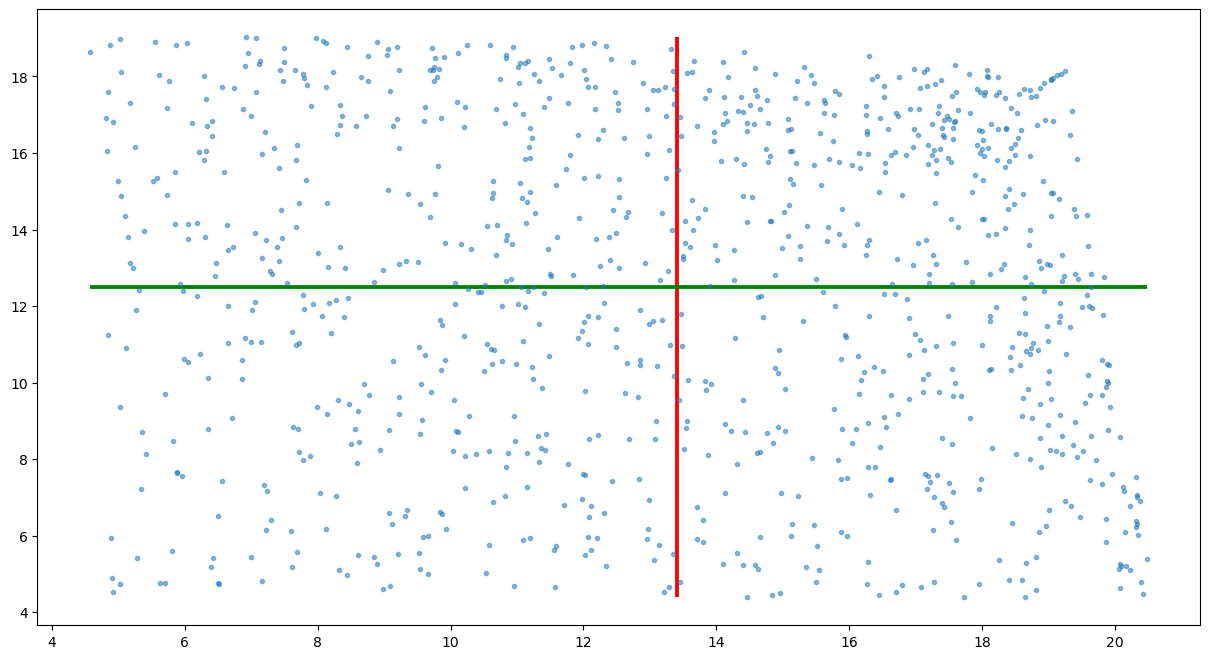

In [85]:
corr_plot(data['QGRS_1'], data['QGRS_2'])

In [86]:
data[Q_cols].describe()

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.144891,0.598367,0.614054,0.666399,0.664024,2.705851,1.196391,1.822495
std,0.220400,0.091653,0.081231,0.087880,0.091158,0.406049,0.202510,1.014773
min,0.636175,0.387032,0.420635,0.471431,0.466832,1.745238,0.724413,-1.241853
25%,0.979187,0.532013,0.555425,0.597678,0.590613,2.398175,1.031066,1.200195
50%,1.129157,0.592575,0.609336,0.663040,0.661720,2.684701,1.189475,1.782435
75%,1.292152,0.658971,0.666939,0.727859,0.730201,3.021945,1.334655,2.489794
max,1.799830,0.908898,0.911945,0.973394,0.964605,3.812800,1.793320,4.864949


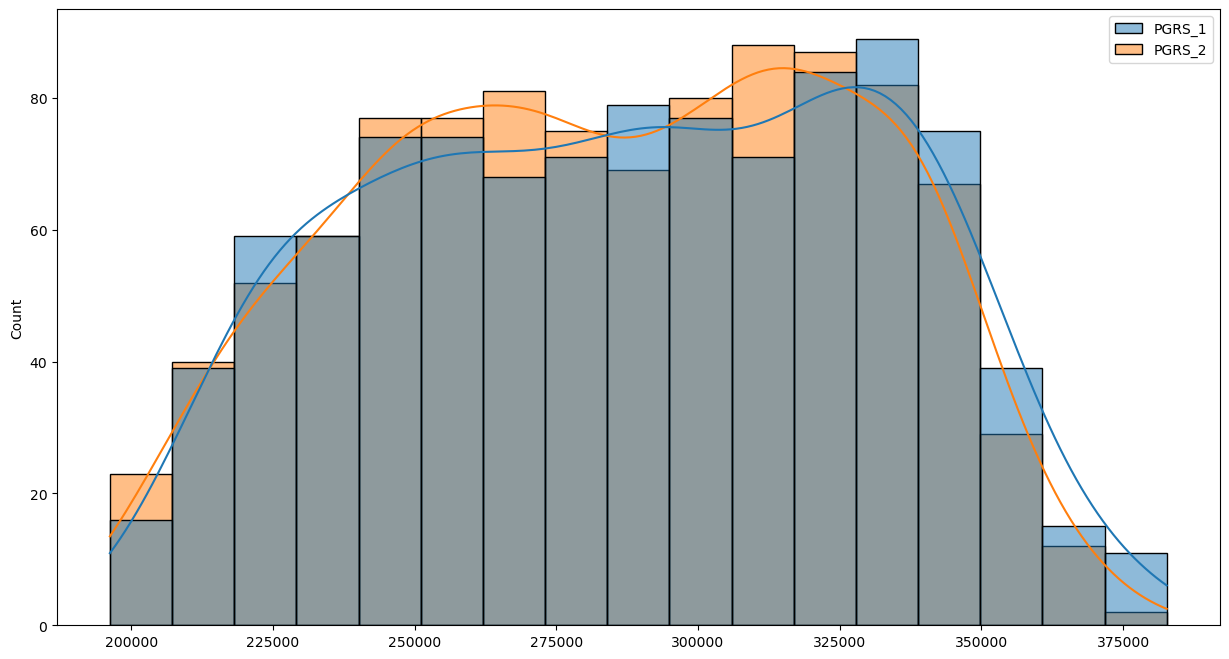

In [87]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data[['PGRS_1','PGRS_2']], kde=True, ax=axes)

plt.show()

In [88]:
sp.stats.normaltest(data['Q_4'].values)

NormaltestResult(statistic=24.478487194046338, pvalue=4.836865857824041e-06)

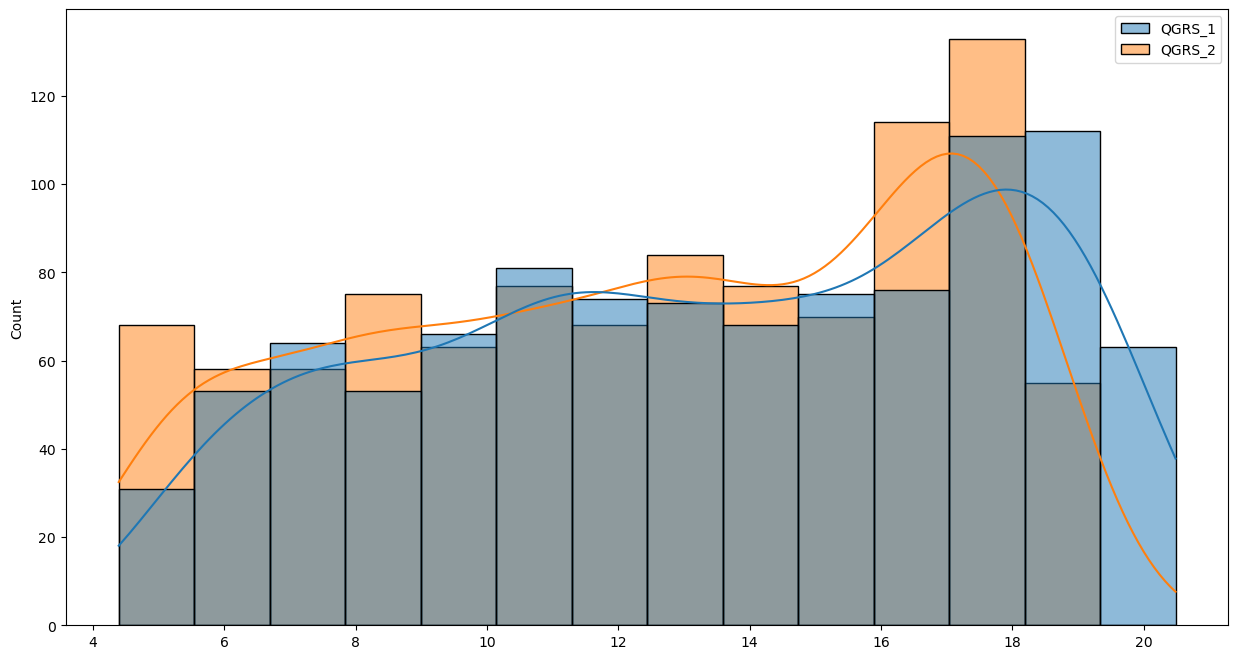

In [89]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data[['QGRS_1','QGRS_2']], kde=True, ax=axes)
plt.show()

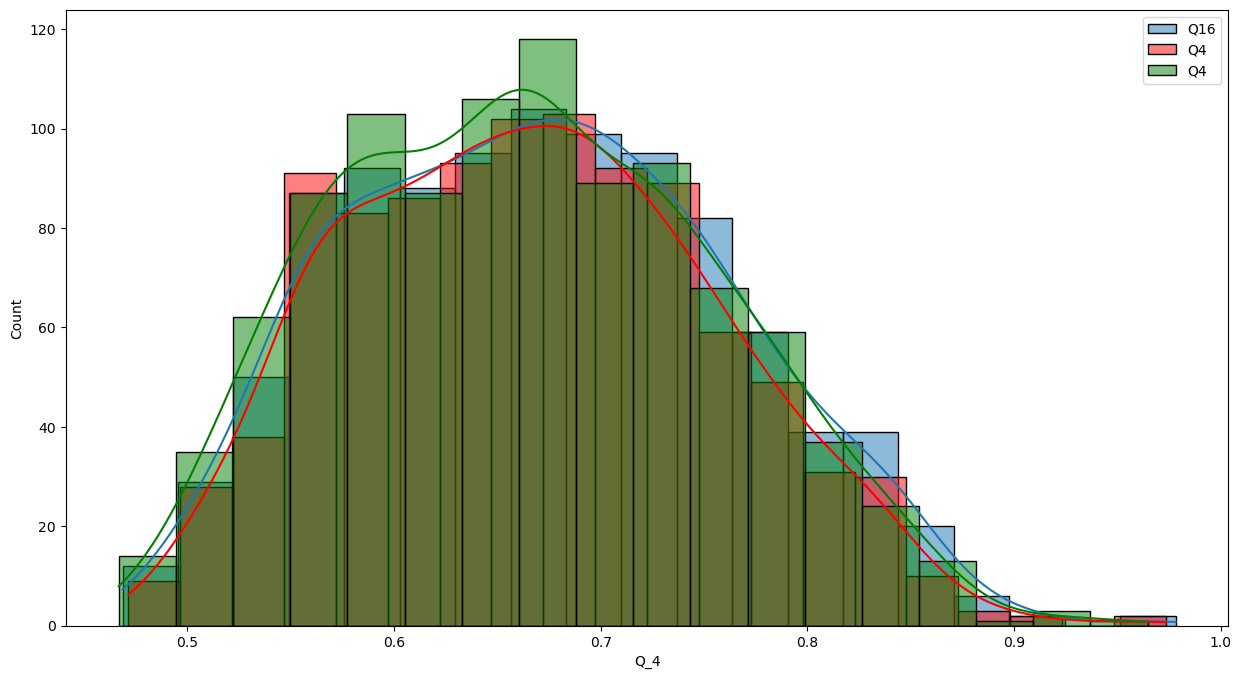

In [90]:
fig ,ax = plt.subplots(figsize=(15,8))


sns.histplot(data['Q_4']*data['P_5']/data['P_4'], kde=True, ax=ax, label='Q16')
sns.histplot(data['Q_4'], kde=True, ax=ax, label='Q4',color='r')
sns.histplot(data['Q_5'], kde=True, ax=ax, label='Q4',color='g')


plt.legend()
plt.show()

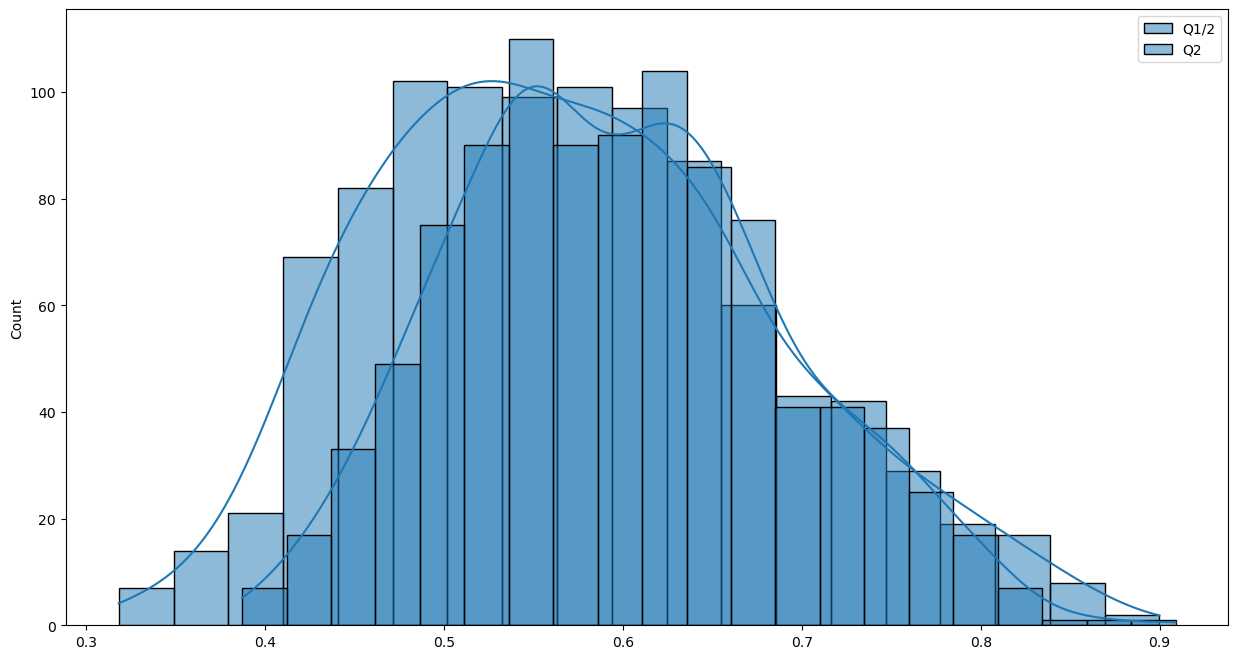

In [91]:
fig ,ax = plt.subplots(figsize=(15,8))
#sns.histplot(data['Q_4'], kde=True, ax=ax, label='Q4',color='r')
#sns.histplot(data['Q_5'], kde=True, ax=ax, label='Q5',color='g')
sns.histplot(np.array(data['Q_1']/2).reshape(-1, 1), kde=True, ax=ax, label='Q1/2',color='b')
sns.histplot(np.array(data['Q_2']).reshape(-1, 1), kde=True, ax=ax, label='Q2',color='r')
#sns.histplot(data['P_6']-data['P_7'], kde=True, ax=ax, label='Q12')
plt.legend()
plt.show()

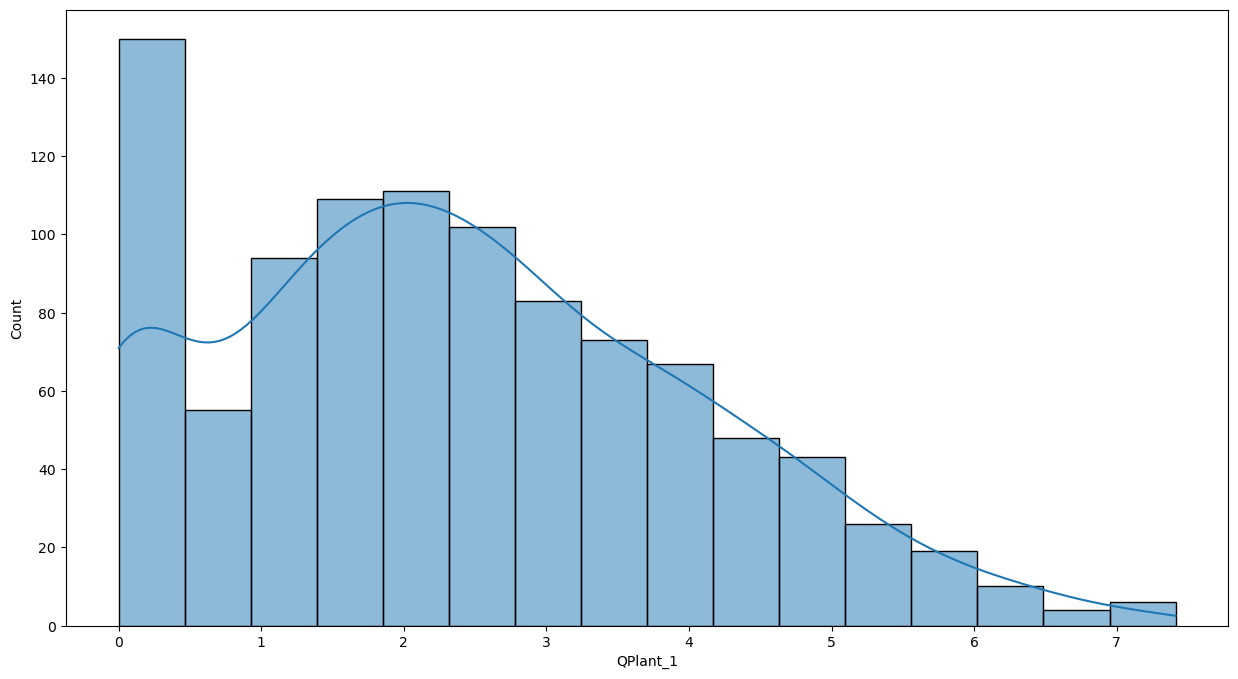

In [92]:
fig ,ax = plt.subplots(figsize=(15,8))


sns.histplot(data['QPlant_1'], kde=True, ax=ax)
plt.show()

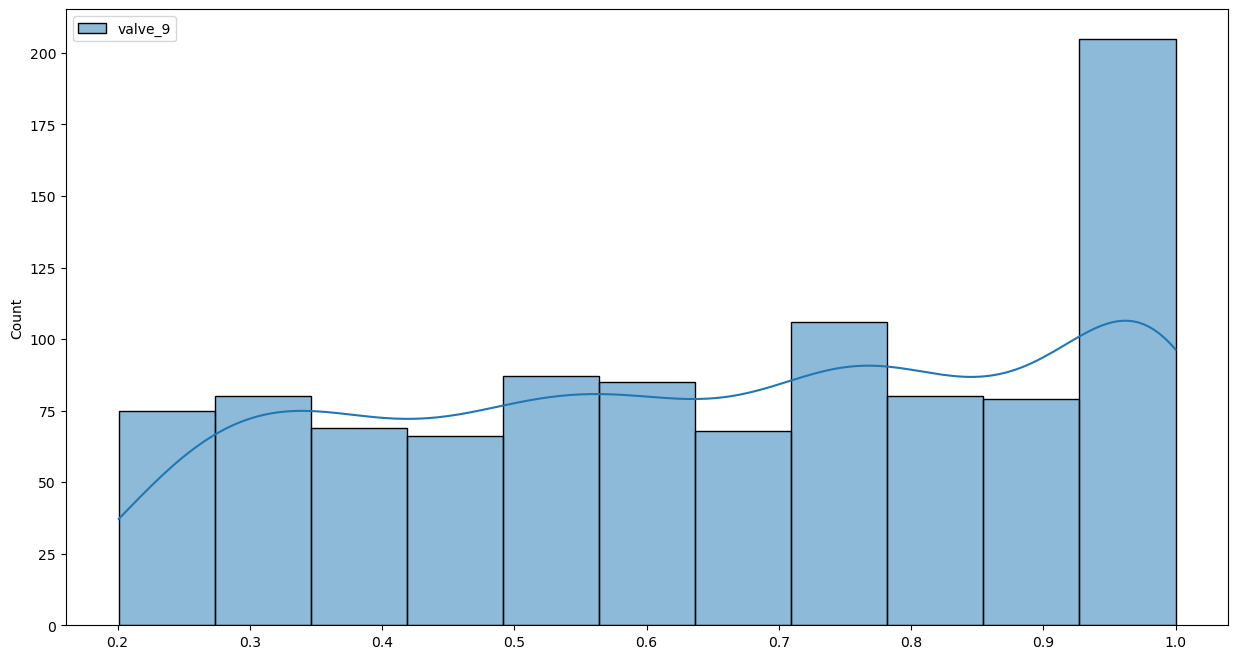

In [93]:
fig ,ax = plt.subplots(figsize=(15,8))

sns.histplot(target[['valve_9']], kde=True, ax=ax)
plt.show()



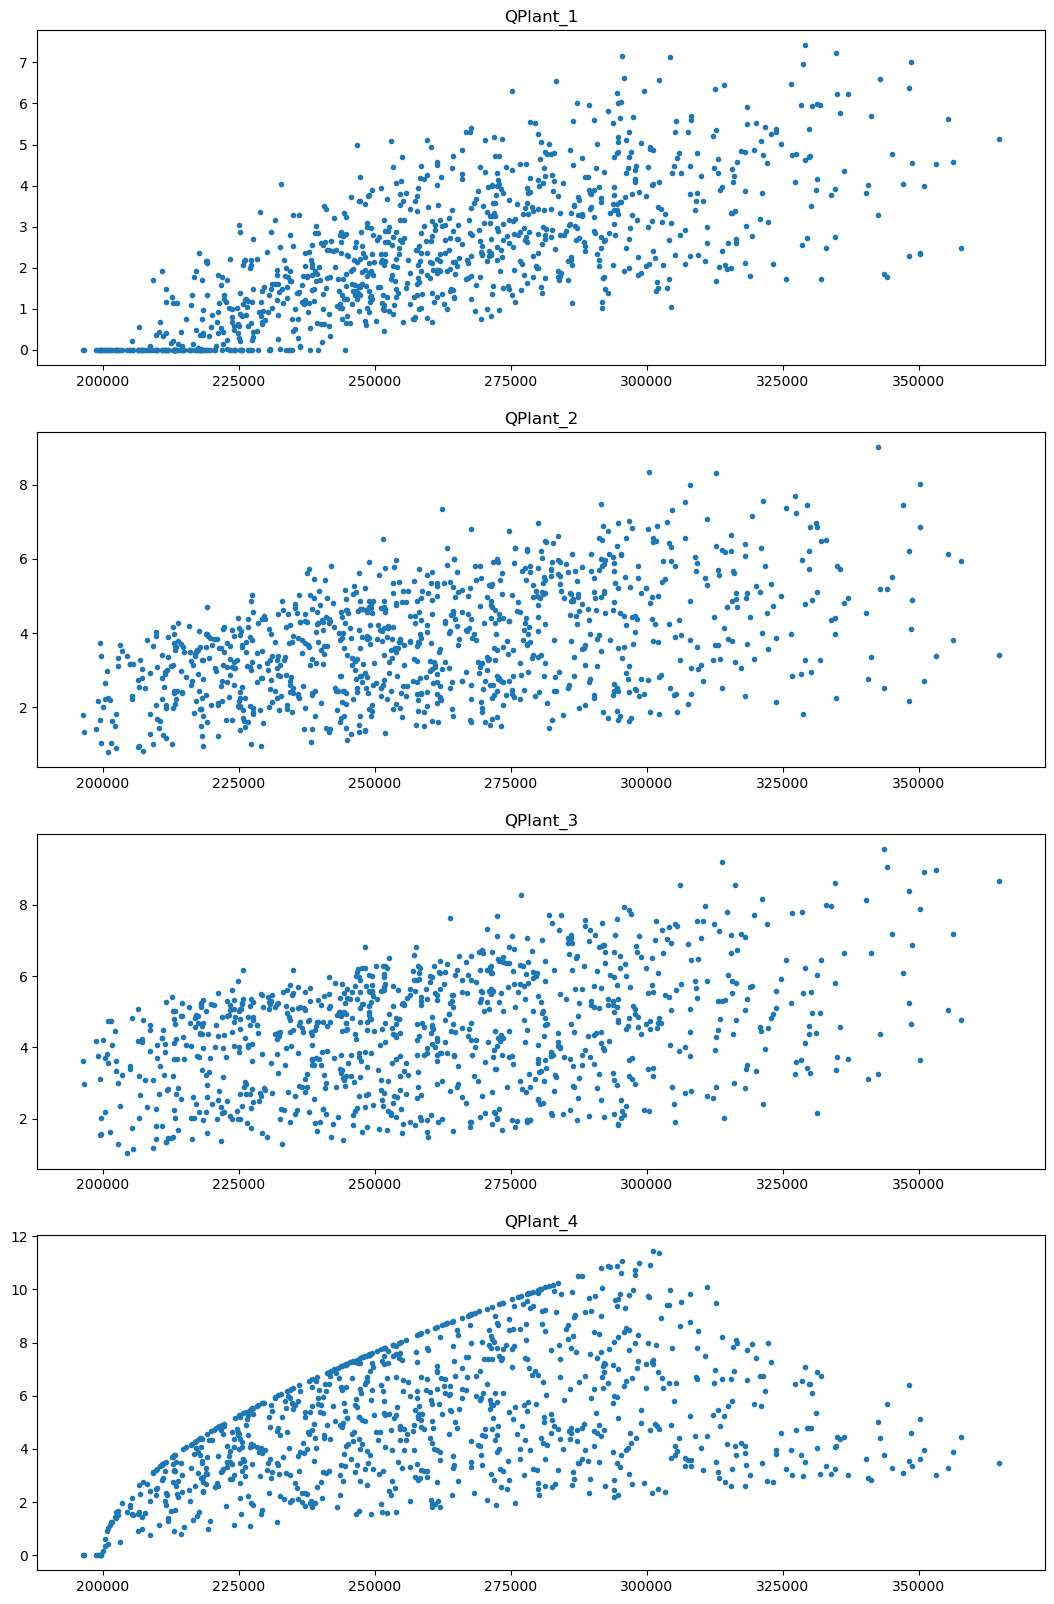

In [95]:
fig, ax = plt.subplots(4,1,figsize=(13,20))
for p in enumerate(Q_plants):
    ax[p[0]].plot(data['P_9'],data[p[1]], '.')
    ax[p[0]].set_title(p[1])
plt.show()

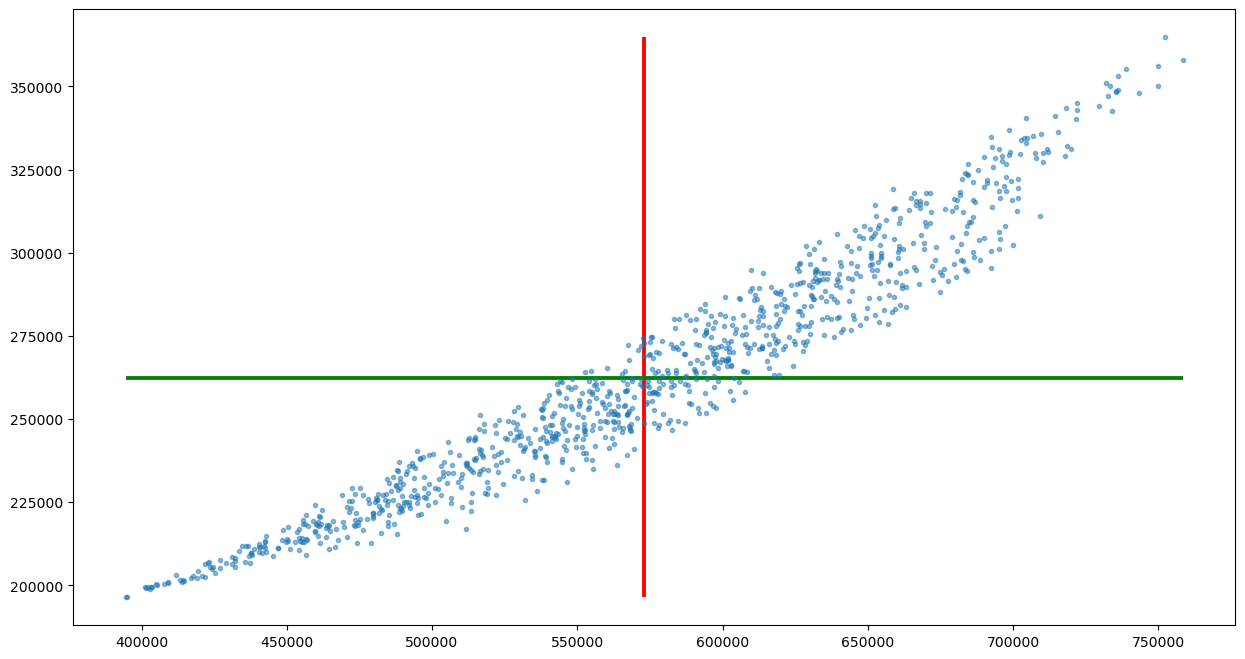

In [96]:
corr_plot(data['PGRS_1']+data['PGRS_2'],data['P_9'])

In [98]:
new_data = data.copy().join(target)
new_data['Q1/2'] = data['Q_1']/2
new_data['Q7/2'] = data['Q_7']/2
new_data_ver = new_data[(new_data['P_9']>200000) & (new_data['Q1/2']>0.6) &
                        (new_data['Q_2']>0.6) & (new_data['Q_3']>0.6) & (new_data['Q_4']>0.6) &
                        (new_data['Q_5']>0.6) & (new_data['Q7/2']>0.6)]
new_data_ver[['Q_6','Q_8']].describe()

,Q_6,Q_8
count,282.000000,282.000000
mean,3.027614,2.067361
std,0.274016,1.011925
min,2.299186,-1.241853
25%,2.846682,1.449790
50%,3.036499,1.963012
75%,3.196005,2.688948
max,3.812800,4.864949


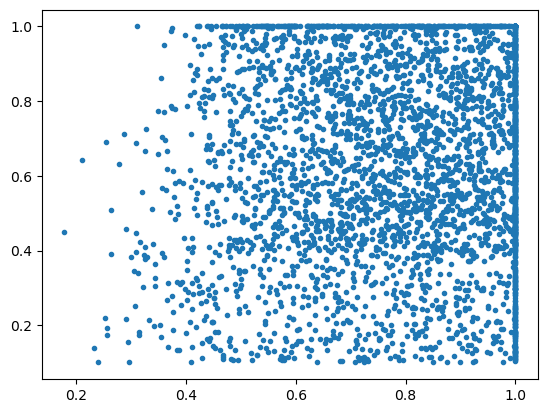

In [40]:
plt.plot(new_data_ver['valve_5'], new_data_ver['valve_10'],'.')
plt.show()    

In [41]:
data.shape

(11130, 24)

In [42]:
new_data_ver.drop(target_cols, axis=1).sample(1)

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q1/2,Q7/2
2122,10.650064,16.984691,1.534629,7.650354,4.824241,1.843789,328157.297635,352466.639374,219155.858018,219400.169275,...,325754.642517,1.208563,0.65256,0.725605,0.770569,0.782683,3.366383,1.435963,0.604281,0.717982


In [43]:
test = data[data['P_9']<200000].iloc[np.random.randint(0,data[data['P_9']<200000].shape[0])]
test['Q1/2'] = test['Q_1']/2
test['Q7/2'] = test['Q_7']/2

In [44]:
test.to_frame().T

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q1/2,Q7/2
5374,2.774286,6.783654,0.0,1.943351,3.633213,0.0,190781.693414,199836.05497,169880.117486,162218.567982,...,191932.716341,0.861171,0.446514,0.491443,0.492002,0.443693,1.829763,0.796333,0.430586,0.398166
